In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('../reports/initial_eval-2.csv')

In [90]:
df = df[df.attack.isin('Clean DICE Random StructackBothEndsGreedy Metattack'.split())]

In [91]:
df.loc[df.attack=='StructackBothEndsGreedy','attack']='Ours'

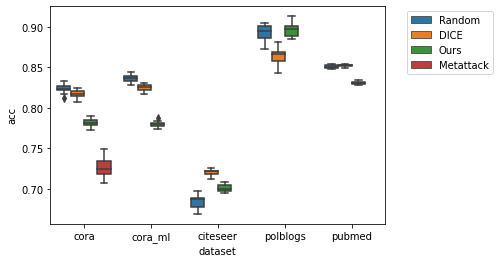

In [92]:
sns.boxplot(data=df[df.perturbation_rate==0.05], x='dataset', y='acc', hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../reports/figures/acc-0.05.pdf',bbox_inches='tight')

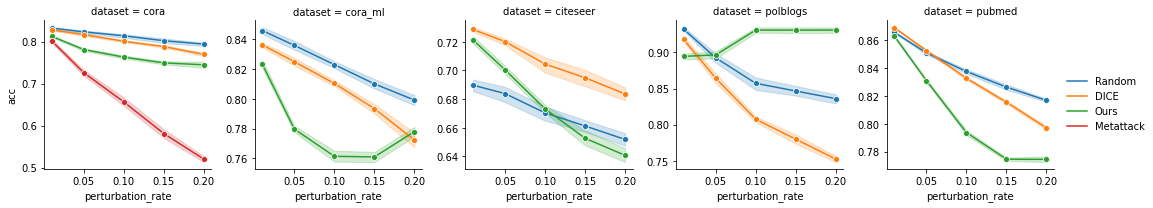

In [93]:
g = sns.FacetGrid(df[df.attack!='Clean'],col='dataset',sharey=False,legend_out=True)
g.map(sns.lineplot,'perturbation_rate','acc','attack',marker='o')
g.add_legend()
plt.savefig('../reports/figures/acc-ptb.pdf',bbox_inches='tight')

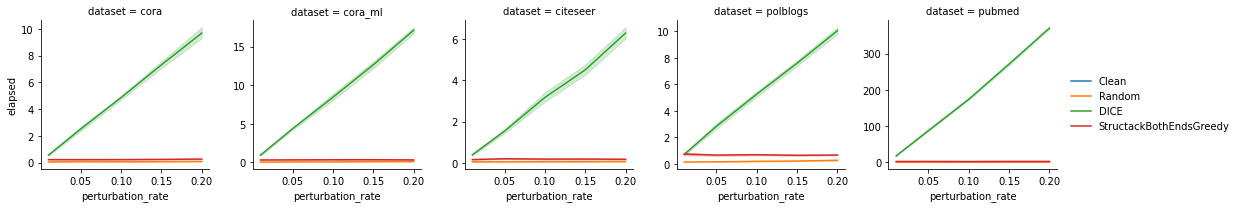

In [48]:
g = sns.FacetGrid(df[df.attack!='Metattack'],col='dataset',sharey=False,legend_out=True)
g.map(sns.lineplot,'perturbation_rate','elapsed','attack')
g.add_legend()

In [78]:
df_elapsed = df.groupby('dataset attack perturbation_rate'.split()).mean()['elapsed'].reset_index()

In [80]:
print(pd.pivot_table(df_elapsed, index='perturbation_rate attack'.split(), columns='dataset'.split(), values=['elapsed'])
      .to_latex(float_format="%.2f",multirow=True))

\begin{tabular}{llrrrrr}
\toprule
     & {} & \multicolumn{5}{l}{elapsed} \\
     & dataset & citeseer &    cora & cora\_ml & polblogs & pubmed \\
perturbation\_rate & attack &          &         &         &          &        \\
\midrule
\multirow{4}{*}{0.01} & DICE &     0.39 &    0.56 &    0.95 &     0.71 &  17.61 \\
     & Metattack &      NaN &   57.82 &     NaN &      NaN &    NaN \\
     & Ours &     0.16 &    0.22 &    0.32 &     0.73 &   2.32 \\
     & Random &     0.05 &    0.05 &    0.06 &     0.13 &   0.43 \\
\cline{1-7}
\multirow{4}{*}{0.05} & DICE &     1.54 &    2.52 &    4.38 &     2.83 &  87.56 \\
     & Metattack &      NaN &  277.68 &     NaN &      NaN &    NaN \\
     & Ours &     0.20 &    0.22 &    0.34 &     0.65 &   2.40 \\
     & Random &     0.05 &    0.07 &    0.08 &     0.15 &   0.56 \\
\cline{1-7}
\multirow{4}{*}{0.10} & DICE &     3.17 &    4.86 &    8.45 &     5.26 & 173.98 \\
     & Metattack &      NaN &  607.81 &     NaN &      NaN &    NaN \\
     & O